In [270]:
import numpy as np
import matplotlib.pyplot as plt

# Molecular Clocks Simulation

by: Francisco Acosta

based on model described in [1].


[1]: Zhang, Cao, Ouyang, Tu. 2020. "The energy cost and optimal design for synchronization of coupled molecular oscillators."

### Create "clock" class

In [57]:
class clock:
    def __init__(self,label,N,k,γ,phase):
        self.label = label
        self.N = N
        self.k = k
        self.γ = γ
        self.phase = phase
        self.time = 0
    
    def update(self,direction):
        self.phase = np.mod(self.phase + direction*2*np.pi/self.N, 2*np.pi)
        self.time += direction*2*np.pi/self.N

### Find time to next event for a Poisson process

input: k (rate)

output: τ (time to next event)

In [266]:
def waiting_time(k):
    if k == 0:
        return 1e10
    Taus = np.linspace(0,1,1000)
    ps = k*np.exp(-k*Taus)
    ps = ps/np.sum(ps)
    τ = np.random.choice(Taus,p=ps)
    
    return τ

# 

In [283]:
def compute_k_ex_forward(ϕ_i,ϕ_j,E_0,Ω,m,N):
        
    return (Ω/m)*(np.exp(-(E_0/2)*np.real((1-np.exp(1j*4*np.pi/N))*np.exp(1j*(ϕ_i-ϕ_j)))))**0.5


def compute_k_ex_backward(ϕ_i,ϕ_j,E_0,Ω,m,N):
    
    return (Ω/m)*(np.exp(-(E_0/2)*np.real((1-np.exp(1j*4*np.pi/N))*np.exp(1j*(ϕ_i-ϕ_j)))))**(-0.5)


In [360]:
def compute_order_parameter(phases,m):
    z = (1/m)*np.sum(np.exp(1j*phases))
    r = np.abs(z)
    ψ = np.angle(z)
    
    return r,ψ

### Simulate molecular clocks (Gillespie algorithm)

inputs:
    
    T: simulation time
    m: number of clocks
    N: number of internal clock states
    k: forward rate of transition, k > 0
    γ: controls backward rate of transition, given by γk, where 0 < γ =< 1 
    
outputs: 

    all_phases: array of shape (num_events,m), num_events = the number of events in the simulation
    all_times: array of shape (num_events,m), specifies the total "time" measured by each clock

In [370]:
def simulate(T,m,N,k,γ,coupling=False):
    ##procession
    
    all_phases = []
    all_clock_times = []
    order_parameter = []
    
    ks = k*np.ones(m)
    γs = γ*np.ones(m)
    init_phases = np.zeros(m)
    
    clocks = [clock(i,N,ks[i],γs[i],init_phases[i]) for i in range(m)]
    
    t = 0
    
    while t < T:
        clock_phases_t = []
        clock_times_t = []
        
        for i in range(m):
            τ_forward = waiting_time(clocks[i].k)
        
            τ_backward = waiting_time(clocks[i].k*clocks[i].γ)
            
            if τ_forward < τ_backward:
                clocks[i].update(+1)
                t += τ_forward
            else:
                clocks[i].update(-1)
                t += τ_backward
            
            if coupling == True:
            
                for j in range(m):
                    k_ex_forward = compute_k_ex_forward(clocks[i].phase,clocks[j].phase,E_0,Ω,m,N)

                    k_ex_backward = compute_k_ex_backward(clocks[i].phase,clocks[j].phase,E_0,Ω,m,N)

                    τ_ex_forward = waiting_time(k_ex_forward)

                    τ_ex_backward = waiting_time(k_ex_backward)

                    if τ_ex_forward < τ_ex_backward:
                        clocks[i].update(+1)
                        clocks[j].update(-1)
                    else:
                        clocks[i].update(-1)
                        clocks[j].update(+1)
                    
            clock_phases_t.append(clocks[i].phase)
            clock_times_t.append(clocks[i].time)
                    
    
        all_phases.append(clock_phases_t)
        all_clock_times.append(clock_times_t)
        
        order_parameter.append(compute_order_parameter(np.array(clock_phases_t),m)[0])
            

    #return np.transpose(all_phases), np.transpose(all_clock_times)
    return all_phases, all_clock_times, order_parameter

### Plots

Text(0.5, 1.0, 'clock time evolution without coupling, γ = 0.6')

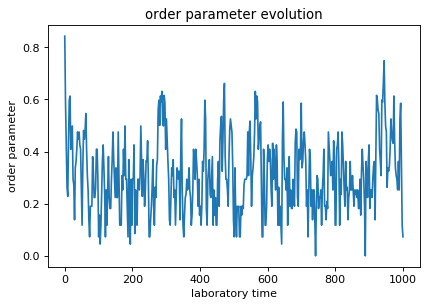

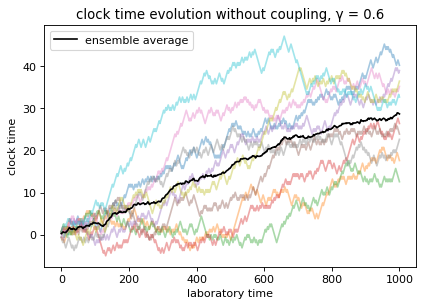

In [383]:
m = 10
N = 10
k = 2
γ = 0.6


coupling = False
Ω = 10
E_0 = 8

random_seed = 20

T = 100*m

np.random.seed(random_seed)

phases, clock_times, order_parameters = simulate(T,m,N,k,γ,coupling)

lab_times = np.linspace(0,T,len(clock_times))

# plot1 = plt.figure(dpi=80)
# plt.plot(lab_times,phases)#,color="orangered")
# plt.ylabel("clock phase")
# plt.xlabel("laboratory time")
# plt.title("clock phase evolution")

plot2 = plt.figure(dpi=80)
plt.plot(lab_times,order_parameters)#,color="orangered")
plt.ylabel("order parameter")
plt.xlabel("laboratory time")
plt.title("order parameter evolution")

plot3 = plt.figure(dpi=80)
plt.plot(lab_times,clock_times,alpha=0.4)#,color="darkblue")
plt.plot(lab_times,np.mean(clock_times,axis=1),color="black",label="ensemble average")
plt.legend()
plt.ylabel("clock time")
plt.xlabel("laboratory time")
plt.title("clock time evolution without coupling, γ = " + str(γ))

Text(0.5, 1.0, 'clock time evolution without coupling, γ = 0.6')

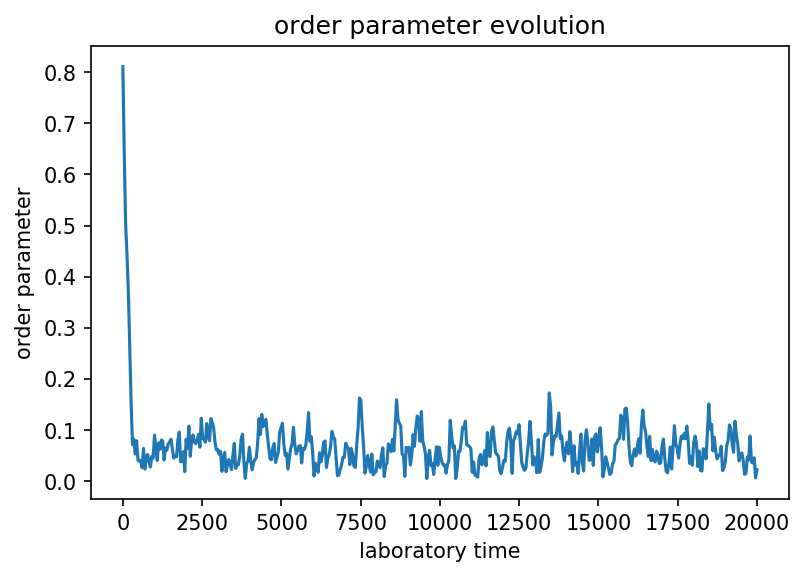

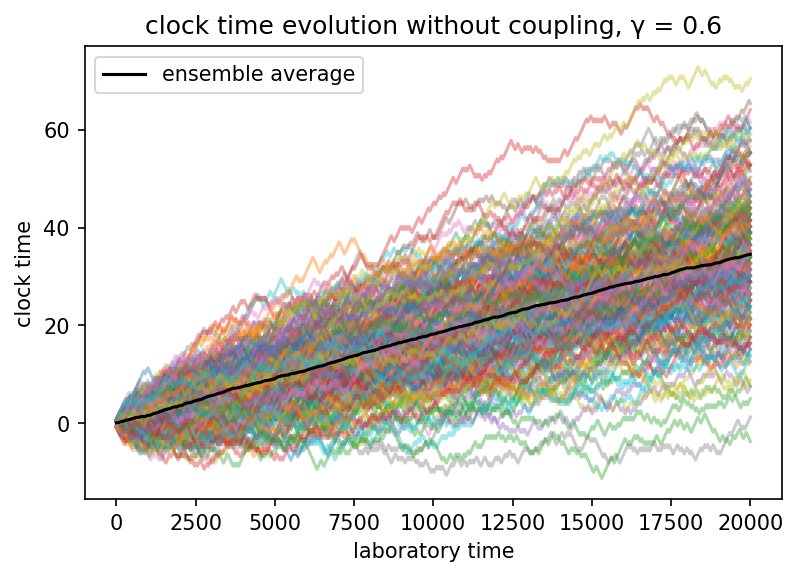

In [382]:
plot2 = plt.figure(dpi=150)
plt.plot(lab_times,order_parameters)#,color="orangered")
plt.ylabel("order parameter")
plt.xlabel("laboratory time")
plt.title("order parameter evolution")

plot3 = plt.figure(dpi=150)
plt.plot(lab_times,clock_times,alpha=0.4)#,color="darkblue")
plt.plot(lab_times,np.mean(clock_times,axis=1),color="black",label="ensemble average")
plt.legend()
plt.ylabel("clock time")
plt.xlabel("laboratory time")
plt.title("clock time evolution without coupling, γ = " + str(γ))

Text(0.5, 1.0, 'clock time evolution with coupling, γ = 0.6')

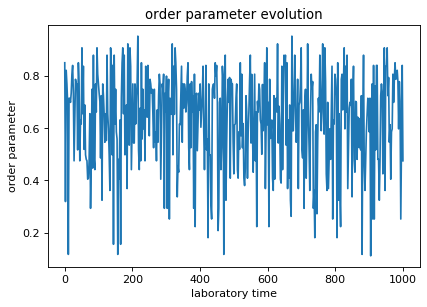

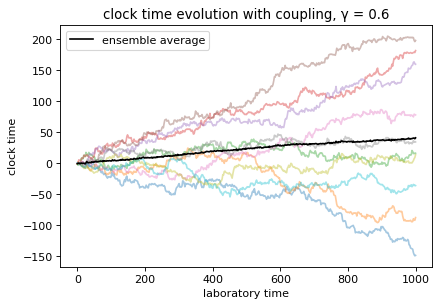

In [384]:
coupling = True

np.random.seed(random_seed)

phases, clock_times, order_parameters = simulate(T,m,N,k,γ,coupling)

lab_times = np.linspace(0,T,len(clock_times))

# plot4 = plt.figure(dpi=80)
# plt.plot(lab_times,phases)#,color="orangered")
# plt.ylabel("clock phase")
# plt.xlabel("laboratory time")
# plt.title("clock phase evolution")

plot5 = plt.figure(dpi=80)
plt.plot(lab_times,order_parameters)#,color="orangered")
plt.ylabel("order parameter")
plt.xlabel("laboratory time")
plt.title("order parameter evolution")

plot6 = plt.figure(dpi=80)
plt.plot(lab_times,clock_times,alpha=0.4)#,color="darkblue")
plt.plot(lab_times,np.mean(clock_times,axis=1),color="black",label="ensemble average")
plt.legend()
plt.ylabel("clock time")
plt.xlabel("laboratory time")
plt.title("clock time evolution with coupling, γ = " + str(γ))